# Trabajo práctico integrador de IAR 2023

### Curso: 5K1
### Grupo: 00
### Integrantes:  
###Aramayo, Marilina  -  70463
###Capovilla, Luisina  - 67999
###Galizio, Matias  -   65155
###Marc, Florencia  -   60060



# Enunciado

## Objetivos académicos

Con este trabajo práctico (TP) se busca ejercitar y evaluar, en situaciones similares a las reales, las siguientes capacidades:
 * Manipulación de datos.
 * Elección, ajuste y evaluación de modelos de clasificación.
 * Interpretación y comunicación de los resultados.




## Problema a resolver

El objetivo particular del TP es clasificar laptops según el tamaño de su memoria RAM. Concretamente, predecir si determinada laptop tiene 16 GB de RAM o más.

Los datos pertenecen al dataset **Laptops Price Dataset**. El dataset está  disponible en [Kaggle](https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset), pero no es necesario extraerlo porque la carga ya está resuelta en este notebook.

**Detalles**:

* El atributo *Final Price* no se debe utilizar.
* Se deben completar todas las secciones (de "Preprocesamiento", incluída, para abajo) del notebook.
* Los datos se deben dividir en dos datasets, entrenamieno y validación. El dataset de validación debe contener el 25% de los datos y ambos deben tener la misma proporción de cada clase.

## Grupos

El TP es grupal.

Los grupos pueden contener **como máximo 4 integrantes**. Como trabajo es el mismo para todos los cursos de IAR, se adminten integrantes de distintos cursos.

Todos los integrantes deben comprender y ser capaces de explicar el trabajo completo.

**Formalización de los grupos**. La conformación de cada grupo de debe informar en [este formulario](https://forms.gle/Qn9755h5wLokTkyf9).

El orden de la carga de los grupos determina la fecha de presentación (no de entrega) del TP. Los primeros grupos en cargar el formulario exponen el último día y viceversa.


## Entregables

* **Notebook**. El presente notebook es un template para relizar el trabajo. Se debe hacer una copia, cargar los datos del encabezado, completar todas las secciones y subir un link al portafolio de cada uno de los integrantes antes de la fecha límite. Los notebooks no se deben editar después de la fecha de entrega.

* **Informe**. Se debe escribir un informe que incluya:
  * Una descripción de los datos y del problema a resolver.
  * Un resumen de lo realizado.
  * Si se utilizaron métodos no vistos en clases, una explicación resumida de los mismos.
  * Problemas encontrados en el camino.
  * Conclusión del TP.
  
  Por simplicidad, el informe se debe escribir al final del notebook.

* **Exposición**. Presentación ante la clase del trabajo realizado.
  * El documento usado para la presentación se debe cargar en el portafolio de todos los integrantes.
  * Durante la presentación también es necesario tener el notebook abierto para mostrar algunos detalles del trabajo.

## Evaluación

Los criterios de evaluación en la [rúbrica](https://docs.google.com/spreadsheets/d/12pJD_Q_9iiCFLuy71Ha-xELHXRfqJcFP9uVsZRyb5A4/edit?usp=sharing) .

## Fechas

* Creación de los grupos: desde el 15/08/2023
* Entrega final de todos los entregables: Ver en la UV
* Fecha de 1ra presentación: Ver en la UV
* Fecha de 2da presentación: Ver en la UV

# Lectura de los datos

In [ ]:
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
datos = pd.read_csv(urllib.request.urlopen("https://drive.google.com/uc?id=1-pktH7BqyjQ4VKHP1tH8VWY8pu2BVKt0"))

# Preprocesamiento

## Importante:

Los pasos que se encuentran a continuación (antes de la clasificación) son muy importantes en los problemas de este tipo. Queda a elección de los grupos qué hacen en cada uno. Pueden omitirlos, cambiarlos de órden y/o agregar nuevas tareas, como el balanceado de las clases por ejemplo, pero cada decisión tomada (qué no se hace, qué sí se hace y cómo se lo hace) se debe fundamentar.

## Exploración de los datos

(distribución, correlación, visualización, etc.)

In [ ]:
#Resumen de los datos:
datos.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


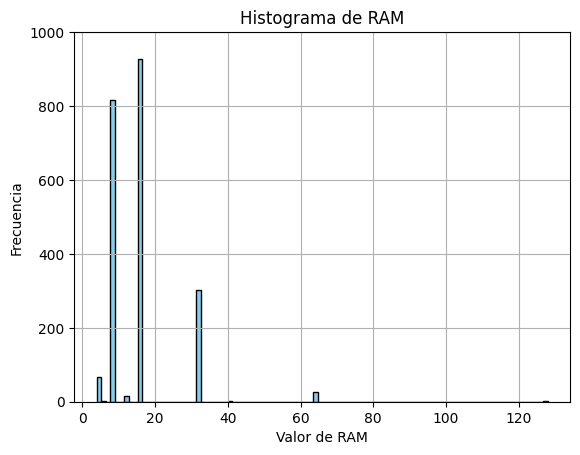

In [ ]:


#Distribución de memoria RAM

# Crear el histograma
plt.hist(datos['RAM'], bins = 100, color='skyblue', edgecolor='black')

# Personalizar el gráfico (opcional)
plt.title('Histograma de RAM')
plt.xlabel('Valor de RAM')
plt.ylabel('Frecuencia')
plt.grid(True)

# Establecer los límites del eje y de manera manual
plt.ylim(0, 1000)  # Puedes ajustar estos límites según tus datos

# Mostrar el histograma y los datos
plt.show()



### Explicación, justificación y conclusiones de las actividades desarrolladas en la sección

## Imputación de valores faltantes

In [ ]:

# Calcula la cantidad de valores nulos en cada columna
null_counts = datos.isnull().sum()

# Calcula la cantidad total de elementos en cada columna
total_counts = datos.count()

# Crea un DataFrame para mostrar la información
info_df = pd.DataFrame({'Cantidad de Valores Nulos': null_counts, 'Cantidad Total de Elementos': total_counts})

# Muestra la tabla de información
info_df

,Cantidad de Valores Nulos,Cantidad Total de Elementos
Laptop,0,2160
Status,0,2160
Brand,0,2160
Model,0,2160
CPU,0,2160
RAM,0,2160
Storage,0,2160
Storage type,42,2118
GPU,1371,789
Screen,4,2156


In [ ]:
#Eliminación de registros a los que les falta el storage type
datos =  datos.dropna(subset=['Storage type'])

In [ ]:
#Registros sin tamaño de pantalla registrado
datos[datos["Screen"].isna()]

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
624,Acer Extensa 15 EX215-54 Intel Core i5-1135G7/...,New,Acer,Extensa,Intel Core i5,8,256,SSD,NaN,NaN,No,524.99
1430,HP ENVY x360 2-in-1 Laptop 15-ew0008np Intel C...,New,HP,Envy,Intel Core i7,16,512,SSD,RTX 2050,NaN,Yes,1863.52
1503,Lenovo IdeaPad Gaming 3 15ACH6 AMD Ryzen 5 560...,New,Lenovo,IdeaPad,AMD Ryzen 5,16,512,SSD,RTX 3060,NaN,No,1505.00
1548,Lenovo ThinkPad P15 Gen 2 Intel Core i7-11850H...,New,Lenovo,ThinkPad,Intel Core i7,16,512,SSD,RTX A2000,NaN,No,2569.00


In [ ]:
#Completado de valores faltantes para columna Screen

datos.at[624, 'Screen'] = 15.6
datos.at[1430, 'Screen'] = 15.6
datos.at[1503, 'Screen'] = 15.6
datos.at[1548, 'Screen'] = 15.6

In [ ]:
#Reemplazar valores faltantes de columna GPU por "N/A"

datos["GPU"] = datos["GPU"].fillna("N/A")


In [ ]:
# Calcula la cantidad de valores nulos en cada columna
null_counts = datos.isnull().sum()

# Calcula la cantidad total de elementos en cada columna
total_counts = datos.count()

# Crea un DataFrame para mostrar la información
info_df = pd.DataFrame({'Cantidad de Valores Nulos': null_counts, 'Cantidad Total de Elementos': total_counts})

# Muestra la tabla de información
info_df

,Cantidad de Valores Nulos,Cantidad Total de Elementos
Laptop,0,2118
Status,0,2118
Brand,0,2118
Model,0,2118
CPU,0,2118
RAM,0,2118
Storage,0,2118
Storage type,0,2118
GPU,0,2118
Screen,0,2118


### Explicación, justificación y conclusiones de las actividades desarrolladas en la sección

## Escalado, estandarizado o normalización

### Explicación, justificación y conclusiones de las actividades desarrolladas en la sección

## Codificación de variables categóricas

In [ ]:
#ANALISIS DE VARIABLES CATEGORICAS
columnas_interes = ['Brand', 'Model', 'Status', 'Storage type', 'CPU', 'GPU', 'Touch']

# Crear una lista para almacenar los DataFrames individuales
frames = []

# Iterar sobre las columnas de interés y obtener los valores distintos
for columna in columnas_interes:
    valores_distintos = datos[columna].unique()
    valores_distintos_str = ', '.join(map(str, valores_distintos))
    frame = pd.DataFrame({'Columna': [columna], 'Valores Distintos': [valores_distintos_str]})
    frames.append(frame)

# Concatenar los DataFrames individuales en uno solo
resultados = pd.concat(frames, ignore_index=True)

# Mostrar la tabla con los valores distintos de manera amigable
resultados.style.set_properties(**{'text-align': 'left'})

,Columna,Valores Distintos
0,Brand,"Asus, Alurin, MSI, HP, Lenovo, Medion, Acer, Apple, Razer, Gigabyte, Dell, LG, Samsung, PcCom, Microsoft, Primux, Prixton, Dynabook Toshiba, Thomson, Denver, Deep Gaming, Vant, Innjoo, Jetwing, Millenium, Realme, Toshiba"
1,Model,"ExpertBook, Go, Katana, 15S, Crosshair, ThinkPad, VivoBook, Akoya, Victus, V15, Thin, ROG, IdeaPad, Cyborg, M515UA, TUF, Aspire, Pavilion, Vector, Chromebook, Omen, ZenBook, Creator, MacBook Air, ThinkBook, 250, Modern, 255, MacBook Pro, Prestige, Stealth, Pulse, Blade, Legion, Raider, ProBook, F515, G5, Vostro, Nitro, Gram, E410, Bravo, Aero, Yoga, Galaxy Book, Erazer, Summit, Ultra, Extensa, Flex, EliteBook, Revolt, Latitude, Envy, Deputy, Predator, Surface Laptop, Flex Advance, 14w, Titan, Ioxbook, Aorus, Swift, Surface Go, Netbook Pro, Surface Pro, Notebook, 470, Spectre, Satellite Pro, XPS, ConceptD, E510, Beast, TravelMate, Portégé, Tecra, Neo, Electronics, 14S, Classmate Pro, 17, Zbook, BR, 300w, M515, Nubian, 100e, Moove, V14, ProArt, 100w, V17, F415EA, LOQ, Leopard, U4, P1511, Enduro, Precision, G7, Voom, N1510, WS63, AURELION, AZIR, Book Prime, Edge, Book, F415, P1411, A7, 15U70N, V330, Alpha, Delta, GL65, GL75"
2,Status,"New, Refurbished"
3,Storage type,"SSD, eMMC"
4,CPU,"Intel Core i5, Intel Celeron, Intel Core i3, Intel Core i7, AMD Ryzen 5, AMD Ryzen 7, AMD Ryzen 3, Apple M1, AMD Athlon, Apple M2, AMD Ryzen 9, Intel Core i9, AMD 3020e, Qualcomm Snapdragon 7, Intel Evo Core i7, Intel Evo Core i5, Intel Pentium, Apple M2 Pro, Intel Evo Core i9, AMD 3015e, Apple M1 Pro, AMD Radeon 9, Mediatek MT8183, AMD 3015Ce, Qualcomm Snapdragon 8, Intel Core M3, Microsoft SQ1"
5,GPU,"N/A, RTX 3050, RTX 4060, RTX 4050, RTX 3060, RTX 4070, RTX 2050, GTX 1650, RTX 3070, 610 M, RTX 4080, RX 6500M, MX 550, RTX 3080, RTX 4090, RX 7600S, A 370M, GTX 1660, RTX A1000, RTX 3000, T 1200, Radeon Pro 5300M, A 730M, Radeon Pro RX 560X, RTX A5500, Radeon Pro 5500M, T 500, T 550, RTX A3000, T 2000, T 600, T 1000, Radeon RX 6600M, MX 330, RTX A2000, MX 450, RTX 2070, RX 6800S, RTX 2080, RTX 2060, GTX 1050, MX 130, P 500, RX 6700M, GTX 1070"
6,Touch,"No, Yes"


In [ ]:
columnas_codificar = ['Brand', 'Model', 'Storage type', 'CPU', 'Touch', 'GPU']

# Aplica la codificación One-Hot a las columnas de interés
datos_codificados = pd.get_dummies(datos, columns=columnas_codificar, prefix=columnas_codificar)

# Mostrar el nuevo DataFrame con las columnas codificadas One-Hot
print(datos_codificados)

                                                 Laptop       Status  RAM  \
0     ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...          New    8   
1     Alurin Go Start Intel Celeron N4020/8GB/256GB ...          New    8   
2     ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...          New    8   
3     MSI Katana GF66 12UC-082XES Intel Core i7-1270...          New   16   
4     HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...          New   16   
...                                                 ...          ...  ...   
2155  Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...  Refurbished   16   
2156  Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...  Refurbished   16   
2157  Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...  Refurbished   32   
2158  Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...  Refurbished   16   
2159  Razer Book FHD+ Intel Evo Core i7-1165G7/16GB/...  Refurbished   16   

      Storage  Screen  Final Price  Brand_Acer  Brand_Alurin  Brand_Apple  

In [ ]:
datos_codificados

,Laptop,Status,RAM,Storage,Screen,Final Price,Brand_Acer,Brand_Alurin,Brand_Apple,Brand_Asus,...,GPU_Radeon Pro 5300M,GPU_Radeon Pro 5500M,GPU_Radeon Pro RX 560X,GPU_Radeon RX 6600M,GPU_T 1000,GPU_T 1200,GPU_T 2000,GPU_T 500,GPU_T 550,GPU_T 600
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,8,512,15.6,1009.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,8,256,15.6,299.00,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,8,256,15.6,789.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,16,1000,15.6,1199.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,16,512,15.6,669.01,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,16,1000,17.3,2699.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,16,1000,17.3,2899.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,32,1000,17.3,3399.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,16,1000,13.4,1899.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


❤
### Explicación, justificación y conclusiones de las actividades desarrolladas en la sección

## Extracción de características

Elección de atributos, reducción de la dimensión, creación de nuevos atributos y/o lo que consideren necesario.

In [ ]:
df_datos_codificados = datos_codificados.drop(columns=["Laptop", "Status", "Storage", "Screen", "Final Price"])
df_datos_codificados

,RAM,Brand_Acer,Brand_Alurin,Brand_Apple,Brand_Asus,Brand_Deep Gaming,Brand_Dell,Brand_Denver,Brand_Dynabook Toshiba,Brand_Gigabyte,...,GPU_Radeon Pro 5300M,GPU_Radeon Pro 5500M,GPU_Radeon Pro RX 560X,GPU_Radeon RX 6600M,GPU_T 1000,GPU_T 1200,GPU_T 2000,GPU_T 500,GPU_T 550,GPU_T 600
0,8,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2156,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2157,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2158,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_datos_ram_cod = df_datos_codificados.copy()
df_datos_ram_cod['RAM'] = df_datos_ram_cod['RAM'].apply(lambda ram: 1 if ram >= 16 else -1)
df_datos_ram_cod

,RAM,Brand_Acer,Brand_Alurin,Brand_Apple,Brand_Asus,Brand_Deep Gaming,Brand_Dell,Brand_Denver,Brand_Dynabook Toshiba,Brand_Gigabyte,...,GPU_Radeon Pro 5300M,GPU_Radeon Pro 5500M,GPU_Radeon Pro RX 560X,GPU_Radeon RX 6600M,GPU_T 1000,GPU_T 1200,GPU_T 2000,GPU_T 500,GPU_T 550,GPU_T 600
0,-1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2156,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2157,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2158,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Explicación, justificación y conclusiones de las actividades desarrolladas en la sección

## Ver bien tema de reducción de dimenciones (con scikit learn)

# Clasificación

Utilizar por lo menos dos técnicas de clasificación

## Ajuste de parámetros

In [ ]:

# Gráfico de dispersión (scatter plot)
#Ya no se puede usar por la codificación de las variables categóricas, se podría poner antes
'''plt.figure(figsize=(12, 6))
plt.scatter(df_datos_ram_cod[df_datos_ram_cod['RAM'] == -1]['Model'], df_datos_ram_cod[df_datos_ram_cod['RAM'] == -1]['CPU'], label='Menos 16 GB RAM', c='b', marker='o')
plt.scatter(df_datos_ram_cod[df_datos_ram_cod['RAM'] == 1]['Model'], df_datos_ram_cod[df_datos_ram_cod['RAM'] == 1]['CPU'], label='16 GB o más de RAM', c='r', marker='x')
plt.xlabel('Model')
plt.ylabel('CPU')
plt.title('Gráfico de dispersión de Model y CPU según Ram')
plt.legend()
plt.show()'''



"plt.figure(figsize=(12, 6))\nplt.scatter(df_datos_ram_cod[df_datos_ram_cod['RAM'] == -1]['Model'], df_datos_ram_cod[df_datos_ram_cod['RAM'] == -1]['CPU'], label='Menos 16 GB RAM', c='b', marker='o')\nplt.scatter(df_datos_ram_cod[df_datos_ram_cod['RAM'] == 1]['Model'], df_datos_ram_cod[df_datos_ram_cod['RAM'] == 1]['CPU'], label='16 GB o más de RAM', c='r', marker='x')\nplt.xlabel('Model')\nplt.ylabel('CPU')\nplt.title('Gráfico de dispersión de Model y CPU según Ram')\nplt.legend()\nplt.show()"

In [ ]:
'''from mpl_toolkits.mplot3d import Axes3D

# Filtrar los datos por el valor de Ram (-1 o 1)
ram_minus_1 = df_datos_ram_cod[df_datos_ram_cod['RAM'] == -1]
ram_1 = df_datos_ram_cod[df_datos_ram_cod['RAM'] == 1]

# Crear una figura 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Agregar puntos de dispersión para Ram -1
ax.scatter(ram_minus_1['Model'], ram_minus_1['CPU'], ram_minus_1['GPU'], c='b', marker='o', label='Menos de 16 GB de RAM')

# Agregar puntos de dispersión para Ram 1
ax.scatter(ram_1['Model'], ram_1['CPU'], ram_1['GPU'], c='r', marker='x', label='16 GB de RAM o más')

ax.set_xlabel('Model')
ax.set_ylabel('CPU')
ax.set_zlabel('GPU')
ax.set_title('Gráfico de dispersión tridimensional de Model, CPU y GPU según Ram')
plt.legend()
plt.show()'''

"from mpl_toolkits.mplot3d import Axes3D\n\n# Filtrar los datos por el valor de Ram (-1 o 1)\nram_minus_1 = df_datos_ram_cod[df_datos_ram_cod['RAM'] == -1]\nram_1 = df_datos_ram_cod[df_datos_ram_cod['RAM'] == 1]\n\n# Crear una figura 3D\nfig = plt.figure(figsize=(12, 10))\nax = fig.add_subplot(111, projection='3d')\n\n# Agregar puntos de dispersión para Ram -1\nax.scatter(ram_minus_1['Model'], ram_minus_1['CPU'], ram_minus_1['GPU'], c='b', marker='o', label='Menos de 16 GB de RAM')\n\n# Agregar puntos de dispersión para Ram 1\nax.scatter(ram_1['Model'], ram_1['CPU'], ram_1['GPU'], c='r', marker='x', label='16 GB de RAM o más')\n\nax.set_xlabel('Model')\nax.set_ylabel('CPU')\nax.set_zlabel('GPU')\nax.set_title('Gráfico de dispersión tridimensional de Model, CPU y GPU según Ram')\nplt.legend()\nplt.show()"

### Reducción de dimensionalidad

In [ ]:
#Reducción de Dimensionalidad
#PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df_prueba_fit = df_datos_ram_cod.copy()

pca = PCA(n_components=2)
pca.fit(df_prueba_fit)
df_fit = pca.transform(df_prueba_fit)

df_fit

#plt.scatter(X[:,1],c=iris.target);

array([[ 1.31747277,  0.46879505],
       [ 1.25185377, -0.28299593],
       [ 1.24055347,  0.06966766],
       ...,
       [-1.16104312, -0.45511075],
       [-0.57415718,  0.91611655],
       [-0.57415718,  0.91611655]])

<ipython-input-45-84dd7fdad878>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_fit[df_datos_ram_cod['RAM'] == -1][:, 0], df_fit[df_datos_ram_cod['RAM'] == -1][:, 1], c='b', label='Ram < 16 GB', cmap='coolwarm')
<ipython-input-45-84dd7fdad878>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_fit[df_datos_ram_cod['RAM'] == 1][:, 0], df_fit[df_datos_ram_cod['RAM'] == 1][:, 1], c='r', label='Ram >= 16 GB', cmap='coolwarm')


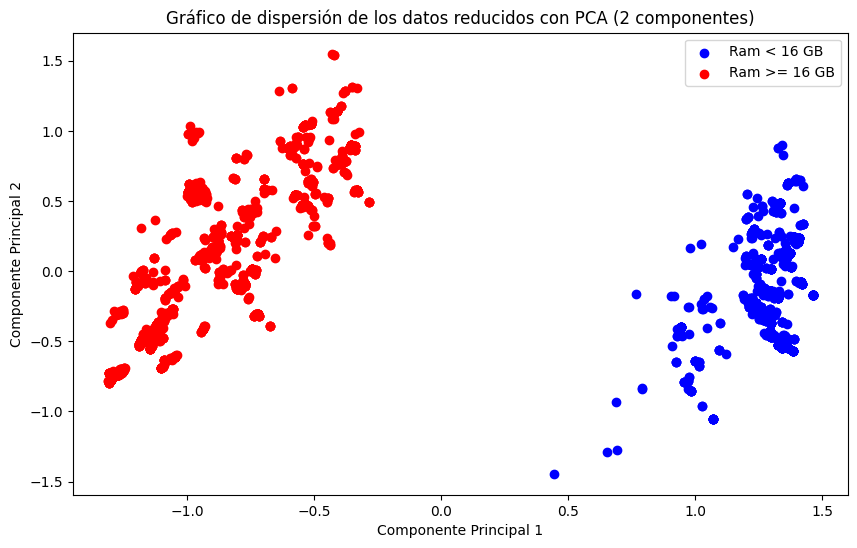

In [ ]:
plt.figure(figsize=(10, 6))

# Crear un gráfico de dispersión para Ram -1
plt.scatter(df_fit[df_datos_ram_cod['RAM'] == -1][:, 0], df_fit[df_datos_ram_cod['RAM'] == -1][:, 1], c='b', label='Ram < 16 GB', cmap='coolwarm')

# Crear un gráfico de dispersión para Ram 1
plt.scatter(df_fit[df_datos_ram_cod['RAM'] == 1][:, 0], df_fit[df_datos_ram_cod['RAM'] == 1][:, 1], c='r', label='Ram >= 16 GB', cmap='coolwarm')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Gráfico de dispersión de los datos reducidos con PCA (2 componentes)')
plt.legend()
plt.show()

### Separación de datasets de prueba y validación

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir el DataFrame en conjuntos de entrenamiento y validación de manera estratificada
df_train, df_val = train_test_split(df_datos_ram_cod, test_size=0.25, random_state=42, stratify=df_datos_ram_cod['RAM'])

# Separar los conjuntos de características (X) y la variable objetivo (Y) para entrenamiento
X_train = df_train.drop('RAM', axis=1)
y_train = df_train['RAM']

# Separar los conjuntos de características (X) y la variable objetivo (Y) para validación
X_val = df_val.drop('RAM', axis=1)
y_val = df_val['RAM']


### Reducción de dimensionalidad y gráfico de dispersión de datos de entrenamiento

<ipython-input-49-b311c15381c1>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_train_fit[df_train['RAM'] == -1][:, 0], df_train_fit[df_train['RAM'] == -1][:, 1], c='b', label='Ram < 16 GB', cmap='coolwarm')
<ipython-input-49-b311c15381c1>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_train_fit[df_train['RAM'] == 1][:, 0], df_train_fit[df_train['RAM'] == 1][:, 1], c='r', label='Ram >= 16 GB', cmap='coolwarm')


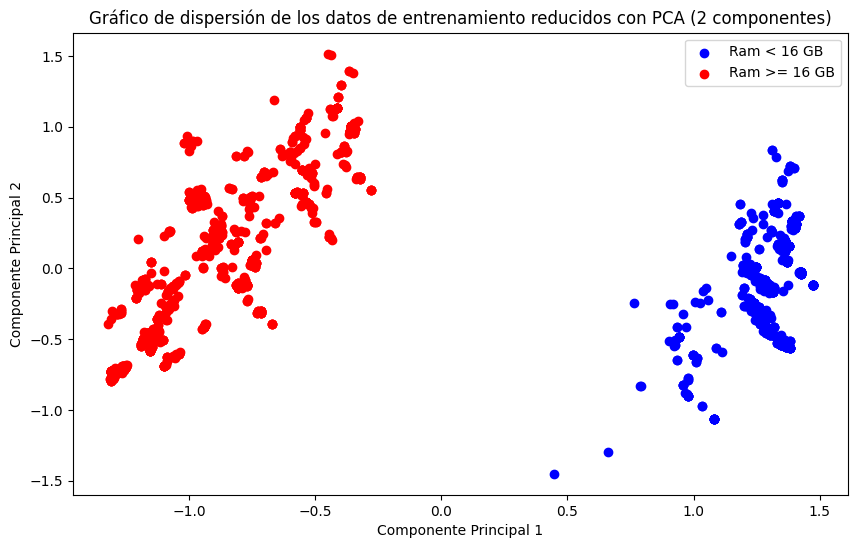

In [ ]:
df_train_fit = df_train.copy()

pca = PCA(n_components=2)
pca.fit(df_train_fit)
df_train_fit = pca.transform(df_train_fit)

plt.figure(figsize=(10, 6))

# Crear un gráfico de dispersión para Ram -1
plt.scatter(df_train_fit[df_train['RAM'] == -1][:, 0], df_train_fit[df_train['RAM'] == -1][:, 1], c='b', label='Ram < 16 GB', cmap='coolwarm')

# Crear un gráfico de dispersión para Ram 1
plt.scatter(df_train_fit[df_train['RAM'] == 1][:, 0], df_train_fit[df_train['RAM'] == 1][:, 1], c='r', label='Ram >= 16 GB', cmap='coolwarm')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Gráfico de dispersión de los datos de entrenamiento reducidos con PCA (2 componentes)')
plt.legend()
plt.show()


### Explicación, justificación y conclusiones de las actividades desarrolladas en la sección

## Predicción

### Explicación, justificación y conclusiones de las actividades desarrolladas en la sección

## Análisis de la importancia de cada característica

### Explicación, justificación y conclusiones de las actividades desarrolladas en la sección

# Evaluación

Por cada modelo de clasificación utilizado calcular:

## Matriz de confusión


### Explicación, justificación y conclusiones de las actividades desarrolladas en la sección

## Accuracy, Precision, Recall, F-score

Las métricas se deben calcular para los dos datasets. La valoración del resultado se hace con las métricas del dataset de validación, pero es útil compararlas con las del dataset de entrenamiento para determinar la magnitud del sobreajuste.

### Explicación, justificación y conclusiones de las actividades desarrolladas en la sección

## Curva ROC

### Explicación, justificación y conclusiones de las actividades desarrolladas en la sección

# Conclusiones

En esta sección se debe escribir una conclusión sobre los datos y el resultado que se obtuvo, no conclusiones generales del TP. Por ejemplo, qué conocimiento nuevo se obtuvo sobre los datos y qué tan exacta y confiable es la predicción que se puede hacer. En otras palabras, la informción que el cliente o el dueño de los datos espera recibir.

Además, si no se lo explicó antes (en esta mimsa sección), responder las siguientes preguntas:

* ¿Cuáles son las salidas del o los modelos utilizados? ¿Qué significan?

* En base a los resultados de evaluación de los modelos, ¿Cuál se debería elegir?

* ¿Los modelos utilizados permiten interpretar o explicar la lógica de la toma de la decisión? En caso de respuesta afirmativa, ¿Cuál es esa lógica? En caso de respuesta negativa, ¿Por qué?

# Informe